<a href="https://colab.research.google.com/github/erchivox/SIEMFAP-Sistema-Inteligente-de-Ecoturismo-y-Monitoreo-de-Fauna-en-reas-Protegidas-/blob/main/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!unrar x /content/data2.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data2.rar


Would you like to replace the existing file data de animales/dataset_peligro_de_extincion/test/Chiguire/images265.jpg
  8097 bytes, modified on 2025-03-04 03:52
with a new one
  8097 bytes, modified on 2025-03-04 03:52

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

In [ ]:
import shutil
import os

test_checkpoints_path = os.path.join(test_dir, ".ipynb_checkpoints")

# Verifica si la carpeta existe y elimínala
if os.path.exists(test_checkpoints_path):
    shutil.rmtree(test_checkpoints_path)
    print("📂 Carpeta '.ipynb_checkpoints' eliminada con éxito.")
else:
    print("✅ No se encontró la carpeta '.ipynb_checkpoints'.")


📂 Carpeta '.ipynb_checkpoints' eliminada con éxito.


estamos actualizando la base de datos para mejorar el modelo

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


#carga del modelo VGG16 preentrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

#agregar capas personalizadas encima del modelo base
x = base_model.output
x = Flatten()(x)  # Aplanar la salida
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  #apagar el 50% de las neuronas y evitar sobreajuste
predictions = Dense(20, activation='softmax')(x)  #estamos decidiendo las categorias que tendra

# Definir el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Crear generadores de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Definir las rutas a tus carpetas de entrenamiento y validación (por definir)
train_dir = '/content/drive/MyDrive/data de animales/dataset_peligro_de_extincion/train'
validation_dir = '/content/drive/MyDrive/data de animales/dataset_peligro_de_extincion/test'

# Generador para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb")

# Generador para el conjunto de validación
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb")

print("Clases en entrenamiento:", train_generator.class_indices)
print("Clases en validación:", validation_generator.class_indices)

# entrenamiento de la ultima capa
model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
    validation_data=validation_generator,
    validation_steps=max(1, validation_generator.samples // validation_generator.batch_size),
    epochs=30)

# Guardar el modelo entrenado
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/Modelos/modelo_clasificador_vgg16_v2.h5')



Found 3414 images belonging to 20 classes.
Found 200 images belonging to 20 classes.
Clases en entrenamiento: {'chuiguire': 0, 'coati andino': 1, 'condor': 2, 'conejo de paaramo': 3, 'jaguar': 4, 'jicotea': 5, 'la curraca': 6, 'la lapa': 7, 'leopardo andino': 8, 'mono araña': 9, 'mono nocturno': 10, 'oso andino': 11, 'oso hormiguero gigante': 12, 'pato de torrente': 13, 'paují de yelmo': 14, 'pava andina': 15, 'puma': 16, 'tonina': 17, 'tortuga carey': 18, 'venado andino': 19}
Clases en validación: {'chiguire': 0, 'coati Andino': 1, 'condor': 2, 'conejo del paramo': 3, 'jaguar': 4, 'jicotea': 5, 'la curraca': 6, 'la lapa': 7, 'leopardo andino': 8, 'mono araña': 9, 'mono nocturno': 10, 'oso andino': 11, 'oso hormiguero gigante': 12, 'pato de torrente': 13, 'paují de yelmo': 14, 'pava andina': 15, 'puma': 16, 'tonina': 17, 'tortuga carey': 18, 'venado andino': 19}
Epoch 1/30
  8/106 ━━━━━━━━━━━━━━━━━━━━ 30:15 19s/step - accuracy: 0.0908 - loss: 3.3216

KeyboardInterrupt: 

Found 200 images belonging to 20 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 113s 16s/step


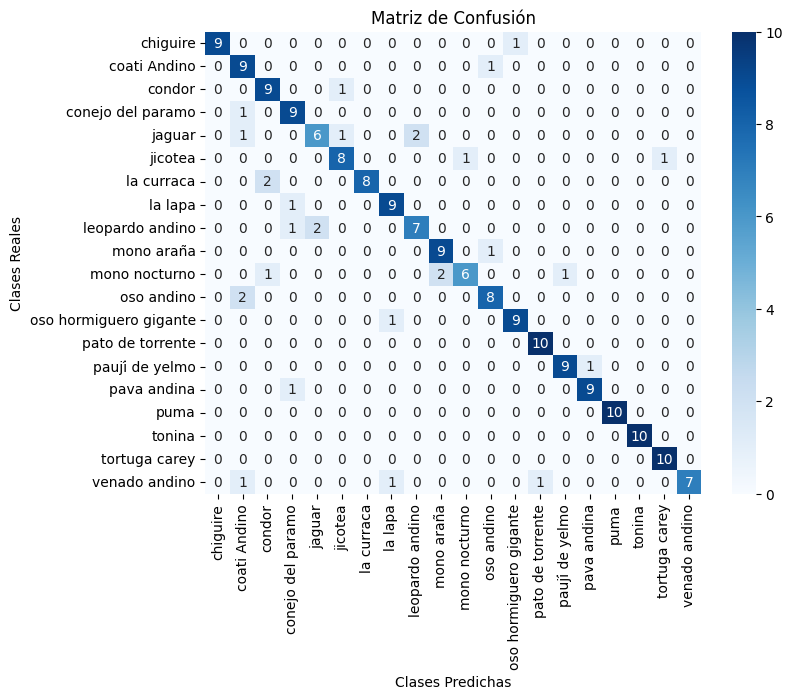

Informe de Clasificación:

                        precision    recall  f1-score   support

              chiguire       1.00      0.90      0.95        10
          coati Andino       0.64      0.90      0.75        10
                condor       0.75      0.90      0.82        10
     conejo del paramo       0.75      0.90      0.82        10
                jaguar       0.75      0.60      0.67        10
               jicotea       0.80      0.80      0.80        10
            la curraca       1.00      0.80      0.89        10
               la lapa       0.82      0.90      0.86        10
       leopardo andino       0.78      0.70      0.74        10
           mono araña       0.82      0.90      0.86        10
         mono nocturno       0.86      0.60      0.71        10
            oso andino       0.80      0.80      0.80        10
oso hormiguero gigante       0.90      0.90      0.90        10
      pato de torrente       0.91      1.00      0.95        10
       pauji

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Ruta del modelo guardado
model_path = '/content/drive/MyDrive/Modelos/modelo_clasificador_vgg16_v2.h5'
model = load_model(model_path)

# Crear un ImageDataGenerator para el conjunto de test (normalizando las imágenes)
test_datagen = ImageDataGenerator(rescale=1./255)

# Directorio del conjunto de test
test_dir = '/content/drive/MyDrive/data de animales/dataset_peligro_de_extincion/test'

# Crear el generador para el conjunto de test:
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='categorical',  # 'categorical' para clasificación multiclase
    shuffle=False  # Importante para mantener el orden de las etiquetas verdaderas
)

# Calcular el número de pasos necesarios y convertirlo a entero
steps = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Realizar las predicciones en el conjunto de test
predictions = model.predict(test_generator, steps=steps)

# Convertir las predicciones (probabilidades) en etiquetas
predicted_classes = np.argmax(predictions, axis=1)

# Extraer las etiquetas verdaderas del generador
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calcular la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)

# Mostrar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Reales")
plt.title("Matriz de Confusión")
plt.show()

# Mostrar el informe de clasificación
print("Informe de Clasificación:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Pagina

instalacion de tunel https e interfaz

In [ ]:
!pip install pyngrok
!pip install streamlit
 !pip install streamlit_javascript

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.4/518.4 kB 7.3 MB/s eta 0:00:00


carga de token para el tunel ngrok

In [ ]:
!ngrok authtoken 2u3j0TEwDK6GRvPFXeMY6MY7RZd_6AnBZT22Y5NPLUPSAtahB

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Iniciar la aplicación Streamlit en un puerto específico
from pyngrok import ngrok
import os

# Abre un túnel en el puerto 8501 (el puerto por defecto de Streamlit)
public_url = ngrok.connect(8501)

# Iniciar Streamlit
os.system('!streamlit run /content/drive/MyDrive/front/app25_SN.py')

# Mostrar la URL pública de ngrok
print('La aplicación está corriendo en:', public_url)


La aplicación está corriendo en: NgrokTunnel: "https://f680-34-69-26-197.ngrok-free.app" -> "http://localhost:8501"


apertura de pagina

In [ ]:
!streamlit run /content/drive/MyDrive/front/app25_SN.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.69.26.197:8501

2025-03-12 22:14:01.442788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741817641.473079   33503 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741817641.481980   33503 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 22:14:01.511296: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuil